In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Financial Analytics data.csv")
data.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


In [3]:
data.isna().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [4]:
data.shape

(488, 5)

In [11]:
data= data.drop(columns=[data.columns[data.columns.str.contains('^Unnamed')][0]])

In [12]:
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51
...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17
484,497,NOCIL,3026.26,249.27
485,498,Orient Cement,3024.32,511.53
486,499,Natl.Fertilizer,3017.07,2840.75


In [13]:
data.isna().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
dtype: int64

In [17]:
mean_mar_cap = data['Mar Cap - Crore'].mean()
mean_sales_qtr = data['Sales Qtr - Crore'].mean()


In [19]:
data['Mar Cap - Crore'].fillna(mean_mar_cap, inplace=True)
data['Sales Qtr - Crore'].fillna(mean_sales_qtr, inplace=True)

In [20]:
data['Mar Cap - Crore']=data['Mar Cap - Crore'].astype(int)
data['Sales Qtr - Crore']=data['Sales Qtr - Crore'].astype(int)

In [21]:
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436,99810
1,2,TCS,563709,30904
2,3,HDFC Bank,482953,20581
3,4,ITC,320985,9772
4,5,H D F C,289497,16840
...,...,...,...,...
483,496,Lak. Vilas Bank,3029,790
484,497,NOCIL,3026,249
485,498,Orient Cement,3024,511
486,499,Natl.Fertilizer,3017,2840


In [22]:
data.isna().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [23]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
483    False
484    False
485    False
486    False
487    False
Length: 488, dtype: bool

C:\Users\godar\Downloads\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


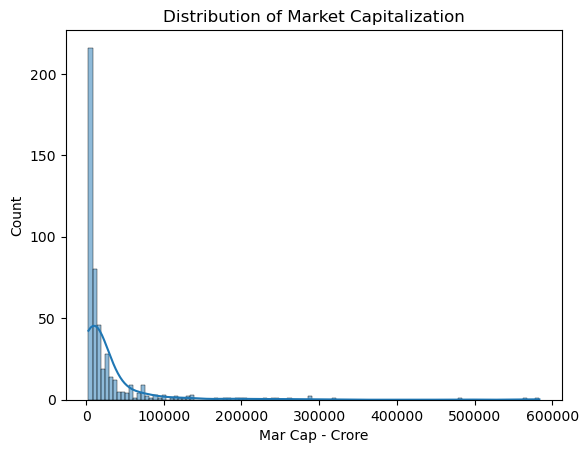

In [26]:
sns.histplot(data['Mar Cap - Crore'], kde=True)
plt.title('Distribution of Market Capitalization')
plt.show()

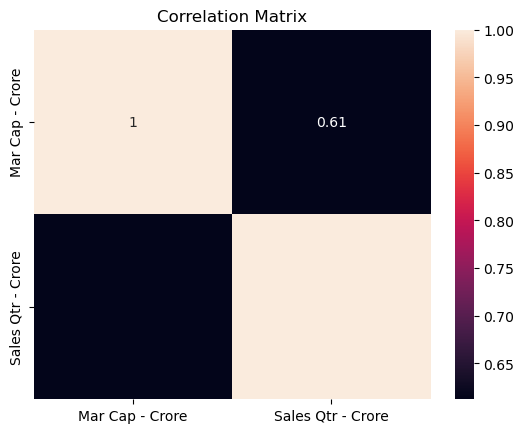

In [28]:
# Correlation Analysis
correlation = data[['Mar Cap - Crore', 'Sales Qtr - Crore']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [29]:
#top and bottom companies
top_company=data.nlargest(10,'Mar Cap - Crore')
bottom_company=data.nsmallest(10,'Mar Cap - Crore')

In [32]:
# top 10 companies
print("top 10 comanies:")
print(top_company[['Name','Mar Cap - Crore']])

top 10 comanies:
             Name  Mar Cap - Crore
0  Reliance Inds.           583436
1             TCS           563709
2       HDFC Bank           482953
3             ITC           320985
4         H D F C           289497
5  Hind. Unilever           288265
6   Maruti Suzuki           263493
7         Infosys           248320
8         O N G C           239981
9  St Bk of India           232763


In [34]:
# botoom 10 companies
print("bottom 10 companies:")
print(bottom_company[['Name','Mar Cap - Crore']])

bottom 10 companies:
                Name  Mar Cap - Crore
486  Natl.Fertilizer             3017
485    Orient Cement             3024
484            NOCIL             3026
483  Lak. Vilas Bank             3029
482      Prime Focus             3031
481    Va Tech Wabag             3041
480     Deepak Fert.             3079
479  Star Ferro Cem.             3115
478  Kaveri Seed Co.             3125
477  Firstsour.Solu.             3139


In [35]:
data.to_csv(r"C:\Users\godar\OneDrive\Desktop\unified mentor\Finance1.csv",index=False)